In [63]:
%matplotlib inline

# https://github.com/california-civic-data-coalition/django-calaccess-raw-data

In [56]:
import csv
import decimal 
from collections import defaultdict
import networkx as nx

# instantiate the graph
dgraph = nx.DiGraph()

fname = '../src/sf/campaign_finance_proof_of_concept_460a.csv'
for row in csv.DictReader(open(fname, 'r'), delimiter=',', quotechar='"'):
    # Clean up the data 
    print(f'{doner} | {donee} | {amount}')
    doner = row['canonical_tran_name']
    donee = row['canonical_filer_naml']
    amount = decimal.Decimal(row['tran_amt2'].replace("$","").replace(",",""))
    
    #### Create the graph ####
    
    # create a new edge if it doesn't exist yet
    if not dgraph.has_edge(doner, donee):
        dgraph.add_edge(doner, donee, amount = amount)
    else:
        # increment the amount
        dgraph[doner][donee]['amount'] += amount


Action Now Initiative | Yes on Proposition V | 2185000.00
Arnold, John | Action Now Initiative | 30000.00
Arnold, John | Action Now Initiative | 130000.00
Arnold, John | Action Now Initiative | 880000.00
Arnold, John | Action Now Initiative | 1630000.00
Arnold, Laura | Action Now Initiative | 30000.00
Arnold, Laura | Action Now Initiative | 130000.00
Arnold, Laura | Action Now Initiative | 880000.00
Arnold, Laura | Action Now Initiative | 1630000.00
Bloomberg, Michael | Yes on Proposition V | 150000.00
Bloomberg, Michael | Yes on Proposition V | 1945497.50
Action Now Initiative | Yes on Proposition V | 10000.00
Action Now Initiative | Yes on Proposition V | 60000.00
Action Now Initiative | Yes on Proposition V | 185000.00
Action Now Initiative | Yes on Proposition V | 1185000.00


In [64]:
dgraph.edges(data='amount')


[('Arnold, John', 'Action Now Initiative', Decimal('2670000.00')),
 ('Action Now Initiative', 'Yes on Proposition V', Decimal('3625000.00')),
 ('Arnold, Laura', 'Action Now Initiative', Decimal('2670000.00')),
 ('Bloomberg, Michael', 'Yes on Proposition V', Decimal('2095497.50'))]

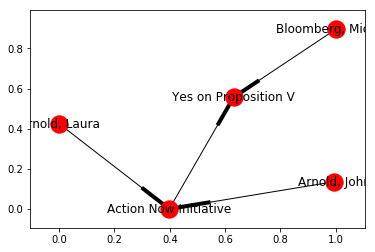

In [71]:
import matplotlib.pyplot as plt

nx.draw_networkx(dgraph)

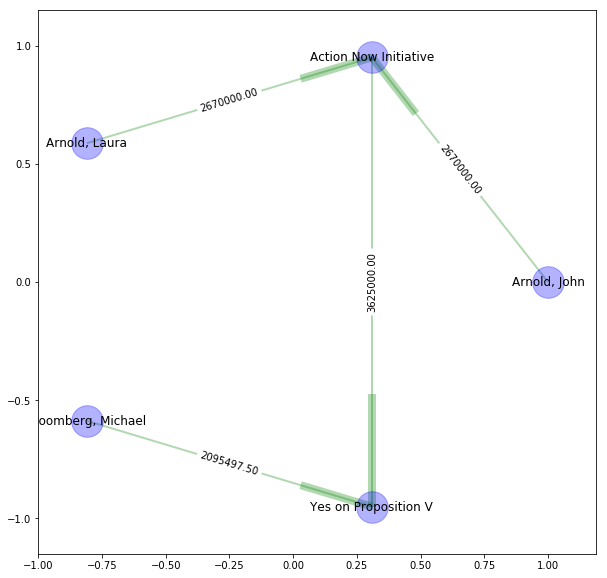

In [84]:
graph_pos = nx.shell_layout(dgraph)
plt.figure(3,figsize=(10,10)) 
nx.draw_networkx_nodes(dgraph, graph_pos, node_size=1000, node_color='blue', alpha=0.3)
nx.draw_networkx_edges(dgraph, graph_pos, width=2, alpha=0.3, edge_color='green')
nx.draw_networkx_labels(dgraph, graph_pos, font_size=12, font_family='sans-serif')

labels = range(len(dgraph))
edge_labels={(u, v): d["amount"] for u, v, d in dgraph.edges(data=True)}
nx.draw_networkx_edge_labels(dgraph, graph_pos, edge_labels=edge_labels)


plt.show()